In [15]:
import glob
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import numpy as np
from sklearn.model_selection import cross_val_score
import cPickle as pickle
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
snowball = SnowballStemmer('english')
%matplotlib inline
plt.style.use('ggplot')

## Load Data and dedupe

In [76]:
df1 = pd.read_csv('../data/kelly_mom.csv', header=None)
df2 = pd.read_csv('../data/baby_center.csv', header=None)
df3 = pd.read_csv('../data/baby_center_vitamins.csv', header=None)
df4 = pd.read_csv('../data/food_insight.csv', header=None)
df5 = pd.read_csv('../data/weight_wellness.csv', header=None)
df6 = pd.read_csv('../data/what_to_expect.csv', header=None)
df7 = pd.read_csv('../data/parenting.csv', header=None)
df8 = pd.read_csv('../data/baby_center_formula.csv', header=None)
df9 = pd.read_csv('../data/parenting2.csv', header=None)
df10 = pd.read_csv('../data/the_bump.csv', header=None)
df11 = pd.read_csv('../data/the_bump2.csv', header=None)
df12 = pd.read_csv('../data/the_bump3.csv', header=None)
df13 = pd.read_csv('../data/parenting3.csv', header=None)
df14 = pd.read_csv('../data/baby_center3.csv', header=None)
df15 = pd.read_csv('../data/baby_center4.csv', header=None)
df_eat = pd.read_csv('../data/eat_right.csv', header=None)
df_fan = pd.read_csv('../data/foodandnutrition.csv', header=None)
df_mayo = pd.read_csv('../data/mayo.csv', header=None)



In [77]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df_eat, df_fan, df_mayo]

In [78]:
result = pd.concat(frames)

In [79]:
result.describe()

,0,1,2
count,4231,4151,3434
unique,3285,3025,2359
top,A Healthy Start to Reduce Childhood Obesity,http://www.eatright.org/resource/health/pregna...,A Healthy Start to Reduce Childhood ObesityRev...
freq,10,20,20


In [84]:
uniques = result.drop_duplicates(subset=[2])

In [6]:
uniques.describe()

,Unnamed: 0
count,2360.000000
mean,176.746186
std,153.478158
min,0.000000
25%,57.000000
50%,131.000000
75%,260.250000
max,735.000000


In [86]:
uniques.dropna(subset=[2])

,0,1,2
0,Mini-Reviews – Nutrition (various books),http://kellymom.com/parenting/reviews/reviews_...,Child of Mine: Feeding With Love and Good Sens...
1,Nutrition for mom while pregnant & breastfeedi...,http://kellymom.com/tandem-faq/04momnutrition/,Special Dietary Considerations (Nursing & preg...
2,Will breastfeeding affect the nutrition of my ...,http://kellymom.com/tandem-faq/03fetalnutrition/,This concern is valid for malnourished mothers...
3,Nutrition for Breastfeeding Toddlers,http://kellymom.com/nutrition/starting-solids/...,DeutschIt seems that all the the information I...
4,Meet Our Sponsor: Theralogix,http://kellymom.com/current-sponsor/meet-spons...,Our sponsor for the month is Theralogix. They ...
5,Meet Our Sponsor: pumpspotting,http://kellymom.com/sponsors/meet-sponsor-pump...,"Our sponsor for the month is pumpspotting, an ..."
6,A message from our sponsor: Doing Our Part for...,http://kellymom.com/sponsors/message-sponsor-p...,Our sponsor for the month is AmedabyRen R. Fis...
7,Meet Our Sponsor: Theralogix,http://kellymom.com/sponsors/meet-our-sponsor-...,"Our sponsor for the month is Theralogix, maker..."
8,Vitamin D and Breastfeeding: An interview with...,http://kellymom.com/nutrition/vitamins/vitamin...,Dr. Bruce Hollis is the lead author of a 2015s...
9,What do I need to know about the WHO Code?,http://kellymom.com/bf/advocacy/what-do-i-need...,Publications from www.ibfan-icdc.orgThe WHO Co...


In [92]:
uniques = uniques.rename(index=str, columns={0: "title", 1: "link", 2: 'content'})

In [7]:
uniques.head()

,Unnamed: 0,title,link,content
0,0,Mini-Reviews – Nutrition (various books),http://kellymom.com/parenting/reviews/reviews_...,Child of Mine: Feeding With Love and Good Sens...
1,1,Nutrition for mom while pregnant & breastfeedi...,http://kellymom.com/tandem-faq/04momnutrition/,Special Dietary Considerations (Nursing & preg...
2,2,Will breastfeeding affect the nutrition of my ...,http://kellymom.com/tandem-faq/03fetalnutrition/,This concern is valid for malnourished mothers...
3,3,Nutrition for Breastfeeding Toddlers,http://kellymom.com/nutrition/starting-solids/...,DeutschIt seems that all the the information I...
4,4,Meet Our Sponsor: Theralogix,http://kellymom.com/current-sponsor/meet-spons...,Our sponsor for the month is Theralogix. They ...


In [10]:
!touch ../data/corpus.csv

In [94]:
uniques.to_csv('../data/corpus.csv')

In [12]:
df16 = pd.read_csv('../data/beachbody.csv', header=None)
df17 = pd.read_csv('../data/bodybuilding.csv', header=None)
df18 = pd.read_csv('../data/davidperl.csv', header=None)
df19 = pd.read_csv('../data/foodbabe.csv', header=None)
dfnatural = pd.read_csv('../data/naturalterrain.csv', header=None)
df_weston = pd.read_csv('../data/weston.csv', header=None)


In [13]:
false = [df16, df17, df18, df19, dfnatural, df_weston]
false_claims = pd.concat(false)
false_claims.to_csv('../data/false_corpus.csv')
false_claims.describe()

,0,1,2
count,709,708,682
unique,702,706,677
top,\nDoes Breastfeeding Really Help You Lose Weig...,https://www.teambeachbody.com/teambeachbodyblo...,"Over the past several decades, many infants ha..."
freq,2,2,2


In [15]:
#didn't use yet
from pymongo import MongoClient

client = MongoClient()
db = client.nutrition
coll = db.articles
documents = ['\n'.join(uniques[2]) for article in coll.find()]

# Data Cleaning

In [5]:
uniques = pd.read_csv('../data/corpus.csv')

In [98]:
uniques = uniques.drop('Unnamed: 0', axis=1)

In [16]:
def stem(content, stemmer ='snowball' ):
    content_clean = str(content).decode('utf-8', errors='ignore').encode('ascii',errors='ignore').replace('\n', ' ')   
    if stemmer=='snowball':
        stemmed = [snowball.stem(word) for word in content_clean.split(' ')]
    return ' '.join(stemmed)

In [17]:
uniques['stemmed_content'] = uniques['content'].apply(stem)

In [18]:
# decode unicode into ascii 
true_content_clean = []
for item in string_list:
    true_content_clean.append(item.decode('utf-8').encode('ascii','ignore').replace('\n', ' '))

false_content_clean = []
for item in false_string_list:
    false_content_clean.append(item.decode('utf-8').encode('ascii','ignore').replace('\n', ' '))

In [21]:
#tokenize (is this the same as below?)
tokenized = [word_tokenize(content.lower()) for content in true_content_clean]
false_tokens = [word_tokenize(content.lower()) for content in false_content_clean]

In [22]:
#remove stopwords. Don't need this if also removing stopwords during TF-IDF
stop = set(stopwords.words('english'))
docs = [[word for word in words if word not in stop]
        for words in tokenized]


In [23]:
#stem all the rows!
stemmed_rows = []
for line in tokenized:
    stemmed = [snowball.stem(word) for word in line]
    stemmed_rows.append(stemmed)
    
false_stemmed_rows = []
for line in false_tokens:
    stemmed = [snowball.stem(word) for word in line]
    false_stemmed_rows.append(stemmed)

In [24]:
content_stemmed = []
for row in stemmed_rows:
    content_stemmed.append(' '.join(row))
    
false_content_stemmed = []
for row in false_stemmed_rows:
    false_content_stemmed.append(' '.join(row))

In [18]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
html_stopwords = ["span", 'vm', 'hook', 'class', 'strong', 'href', 'style', 'rgb', 
                  'transpar', '153', 'br', 'strong', 'span', 'com', 'vm', 'img', 'http', 'zzzzzzzzzzzz']
stop.update(html_stopwords)


# KMeans Clustering

In [116]:
Tfid = TfidfVectorizer(stop_words=stop, max_features=20000)
# TFid_false = TfidfVectorizer(stop_words=stop,)

In [117]:
true_sparse_matrix = Tfid.fit_transform(uniques['stemmed_content'])
# false_sparse_matrix = TFid_false.fit_transform(false_content_stemmed)

In [118]:
true_features = Tfid.get_feature_names()
# false_features = TFid_false.get_feature_names()

In [119]:
km_true = KMeans(n_clusters=20)
# km_false = KMeans(n_clusters = 10)

In [120]:
km_true.fit(true_sparse_matrix)
# km_false.fit(false_sparse_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [121]:
top_centroids = km_true.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(true_features[i] for i in centroid))
# print '--------------------------'    
# top_false_centroids = km_false.cluster_centers_.argsort()[:,-1:-11:-1]
# print "top features for each cluster:"
# for num, centroid in enumerate(top_false_centroids):
#     print "%d: %s" % (num, ", ".join(false_features[i] for i in centroid))

top features for each cluster:
0: edit, modul, stone, 2013, soup, moduleshow, food, 2014, 2015, tag
1: de, vheight, retri, setsizeiframe, inputs, funct, var, positionmobilead, monografa, settimeout
2: child, kid, children, food, make, eat, parti, get, like, toddler
3: em, color, www, target, _blank, display, food, parenting, border, icon
4: breastfeed, mother, milk, nurs, infant, breastfeeding, lactat, babi, breast, mom
5: gram, cup, teaspoon, nutrientsnutri, time, swinney, bridget, minutescook, minutestot, cook
6: vitamin, iron, supplement, calcium, need, babi, diet, get, recommend, food
7: pubm, view, epub, ja, cancer, clin, mar, dec, rj, jm
8: el, de, durant, embarazo, la, en, los, para, del, que
9: fish, fat, eat, food, omega, ounc, protein, calori, healthi, diet
10: de, la, para, el, en, los, del, que, las, un
11: food, babi, nutrit, raw, eat, academi, foods, nutritionist, meat, cook
12: babi, modal, window, time, close, set, rate1chapterschaptersdescript, serifmonospac, 00progres

In [122]:
km_true.cluster_centers_.shape


(20, 20000)

In [123]:
transformed_matrix = km_true.transform(true_sparse_matrix)

In [88]:
for i in range(0,21,5):
    reduced_data = PCA(n_components=i).fit(transformed_matrix)
    print i
    print reduced_data.explained_variance_ 
    print sum(reduced_data.explained_variance_)
    print '---------------'

0
[]
0
---------------
5
[ 0.06425572  0.01300228  0.00516335  0.00349167  0.00271304]
0.0886260495763
---------------
10
[ 0.06425572  0.01300228  0.00516335  0.00349167  0.00271304  0.00241697
  0.00196808  0.0016453   0.00127721  0.00112714]
0.0970607459263
---------------
15
[ 0.06425572  0.01300228  0.00516335  0.00349167  0.00271304  0.00241697
  0.00196808  0.0016453   0.00127721  0.00112714  0.00103701  0.00093687
  0.00078655  0.00055912  0.00048122]
0.100861523778
---------------
20
[  6.42557181e-02   1.30022757e-02   5.16335483e-03   3.49166509e-03
   2.71303630e-03   2.41696956e-03   1.96807923e-03   1.64530084e-03
   1.27720603e-03   1.12714026e-03   1.03701423e-03   9.36872614e-04
   7.86549536e-04   5.59123808e-04   4.81217660e-04   4.04010735e-04
   2.85733927e-04   1.95030685e-04   1.60891632e-04   6.23235852e-05]
0.101969514343
---------------


In [124]:
reduced_data = PCA(n_components=15).fit_transform(transformed_matrix)

In [135]:
coordinates = pd.DataFrame(reduced_data)

coordinates = coordinates.reset_index()
coordinates = coordinates.drop('index', axis=1)

content_coordinates = uniques.join(coordinates, lsuffix='labels', rsuffix='index')

content_coordinates.head()

,title,link,content,stemmed_content,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Mini-Reviews – Nutrition (various books),http://kellymom.com/parenting/reviews/reviews_...,Child of Mine: Feeding With Love and Good Sens...,child of mine: feed with love and good sens by...,15,-0.130720,0.020728,-0.006654,0.013871,-0.010658,0.032917,-0.013200,-0.003879,-0.008841,-0.015568,0.056352,-0.005806,-0.028238,-0.001944,-0.014331
1,Nutrition for mom while pregnant & breastfeedi...,http://kellymom.com/tandem-faq/04momnutrition/,Special Dietary Considerations (Nursing & preg...,special dietari consider (nurs & pregnant/tand...,4,-0.135578,0.093275,0.010675,-0.036561,0.018046,-0.001289,0.013408,0.068601,-0.010021,-0.001630,-0.015528,0.057505,-0.013909,-0.005552,0.017055
2,Will breastfeeding affect the nutrition of my ...,http://kellymom.com/tandem-faq/03fetalnutrition/,This concern is valid for malnourished mothers...,"this concern is valid for malnourish mothers, ...",4,-0.113776,0.001904,-0.000726,-0.049674,0.003574,-0.024180,0.019107,0.036850,-0.008204,0.002296,-0.011848,0.031448,-0.002919,0.003951,0.020800
3,Nutrition for Breastfeeding Toddlers,http://kellymom.com/nutrition/starting-solids/...,DeutschIt seems that all the the information I...,deutschit seem that all the the inform i see r...,18,-0.175827,0.252231,0.014519,0.020313,-0.009048,-0.013558,0.007942,0.053899,-0.032752,-0.018601,0.023989,-0.016437,-0.064566,-0.008332,-0.035577
4,Meet Our Sponsor: Theralogix,http://kellymom.com/current-sponsor/meet-spons...,Our sponsor for the month is Theralogix. They ...,our sponsor for the month is theralogix. they ...,3,-0.122390,0.060123,0.006550,-0.018355,0.037109,-0.013618,-0.009886,0.070199,-0.016931,0.001120,-0.044593,0.012794,0.007629,0.011226,-0.034459


In [ ]:
centroids = kmeans.cluster_centers_

In [164]:
dist = (centroids[6] + centroids[14])/2.0

In [141]:
from scipy.spatial import KDTree

In [142]:
coordinate_ktree = KDTree(coordinates)

In [165]:
_, knn_indexes = coordinate_ktree.query(dist, 5)

In [166]:
knn_indexes

array([2056, 2238, 2131, 2090, 2086])

In [180]:
articles = []
for i in knn_indexes:
     articles.append(uniques.iloc[[i]])

In [182]:
uniques.iloc[knn_indexes]

,title,link,content,stemmed_content,labels
2056,"\n\n\n\n Omega-3 fatty acids, fish o...",http://www.mayoclinic.org/drugs-supplements/om...,"Monografa de pacientes de Natural Standard, Co...","monografa de pacient de natur standard, copyri...",17
2238,\n\n\n\n Coenzyme Q10 Evidence - May...,http://www.mayoclinic.org/drugs-supplements/co...,"Monografa de pacientes de Natural Standard, Co...","monografa de pacient de natur standard, copyri...",17
2131,\n\n\n\n Glucosamine Safety - Mayo C...,http://www.mayoclinic.org/drugs-supplements/gl...,"Monografa de pacientes de Natural Standard, Co...","monografa de pacient de natur standard, copyri...",17
2090,\n\n\n\n Tolvaptan (Oral Route) Befo...,http://www.mayoclinic.org/drugs-supplements/to...,Description and Brand NamesDrug information pr...,descript and brand namesdrug inform provid by:...,9
2086,\n\n\n\n Cefuroxime (Injection Route...,http://www.mayoclinic.org/drugs-supplements/ce...,Description and Brand NamesDrug information pr...,descript and brand namesdrug inform provid by:...,9


In [140]:
content_coordinates['dist'] = np.linalg.norm(coordinates-dist)
content_sorted = content_coordinates.sort_values('dist', axis=0)
content_sorted.head()

,title,link,content,stemmed_content,labels,0,1,2,3,4,...,6,7,8,9,10,11,12,13,14,dist
0,Mini-Reviews – Nutrition (various books),http://kellymom.com/parenting/reviews/reviews_...,Child of Mine: Feeding With Love and Good Sens...,child of mine: feed with love and good sens by...,15,-0.130720,0.020728,-0.006654,0.013871,-0.010658,...,-0.013200,-0.003879,-0.008841,-0.015568,0.056352,-0.005806,-0.028238,-0.001944,-0.014331,37.3514
1569,When Breast and Bottle Both Are Best,http://www.parenting.com/article/when-breast-a...,"But once home, Clara's blissful ideas of breas...","but onc home, clara bliss idea of breastfeed w...",0,-0.154553,0.167003,0.009036,-0.097582,-0.000274,...,0.052667,0.028807,-0.018312,-0.000530,-0.008435,0.018720,-0.011097,-0.007523,-0.001014,37.3514
1570,The Power of Prenatal Yoga,http://www.parenting.com/blogs/project-pregnan...,"<p class=""week-display-title"">find your week<s...","<p class=""week-display-title"">find your week<s...",16,-0.109368,-0.044099,-0.003673,-0.028553,-0.000740,...,-0.018883,-0.007958,0.005229,0.002495,0.014139,0.021715,0.010715,0.014223,0.015737,37.3514
1571,Should Babies Eat Fish?,http://www.parenting.com/article/feeding-fish-...,"Sure, it's an untraditional <span class=""vm-ho...","sure, it an untradit <span class=""vm-hook-out ...",7,-0.136892,0.068382,0.001370,0.052263,-0.000338,...,-0.029829,0.030930,-0.017030,-0.010515,0.005213,-0.040224,-0.007200,-0.024638,0.033596,37.3514
1572,Tips for preschoolers: Healthy snacks and meals,https://www.babycenter.com/0_tips-for-preschoo...,Teach your preschooler to savor delicious and ...,teach your preschool to savor delici and nutri...,15,-0.136588,0.036667,-0.007499,0.083903,-0.025882,...,-0.028610,-0.008841,-0.006619,-0.019484,0.067313,-0.010101,-0.042052,-0.013108,-0.013870,37.3514


In [125]:
kmeans = KMeans(init='k-means++', n_clusters=20, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min(), reduced_data[:, 0].max()
y_min, y_max = reduced_data[:, 1].min(), reduced_data[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

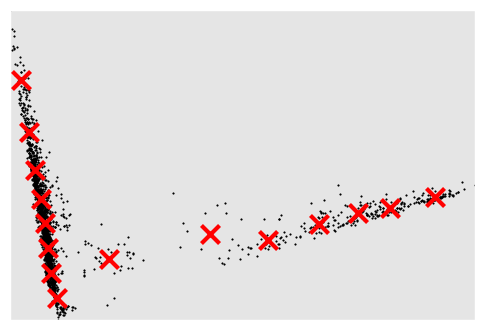

In [35]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)
# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i],y[i]))
# plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [93]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(true_features[i] for i in centroid))

top features for each cluster:
0: 00playback, 01, 0157, 05, 04health, 05loaded, 001, 06, 03health, 04
1: 00, 000, 001, 01loaded, 04, 02, 01, 03, 05, 05loaded
2: 000, 00playback, 01, 0157, 01playback, 05playback, 03health, 03, 001, 06
3: 001, 00progress, 00, 00playback, 0000, 01, 03, 04health, 05playback, 05
4: 00, 00loaded, 00playback, 000, 00progress, 01, 01playback, 04, 05, 04health
5: 000, 02, 00progress, 01playback, 04, 04health, 05, 06, 05loaded, 00loaded
6: 01playback, 001, 00loaded, 0000, 0157, 00playback, 03, 04health, 05loaded, 00
7: 000, 00playback, 01playback, 03health, 01, 03, 05playback, 05loaded, 01loaded, 04
8: 06, 00playback, 03health, 01loaded, 04health, 05playback, 05, 05loaded, 04, 00progress
9: 000, 0157, 0000, 00loaded, 001, 02, 03, 06, 01loaded, 05loaded
10: 0000, 00playback, 01playback, 000, 04, 0157, 05loaded, 05playback, 05, 01loaded
11: 000, 0000, 00loaded, 001, 02, 03health, 01loaded, 04, 05, 05loaded
12: 00, 000, 001, 01loaded, 04, 03health, 05, 06, 04health

In [102]:
labels = km_true.labels_
labels

array([15,  4,  4, ...,  2,  7,  2], dtype=int32)

In [103]:
uniques['labels'] = labels
uniques.head()

,title,link,content,stemmed_content,labels
0,Mini-Reviews – Nutrition (various books),http://kellymom.com/parenting/reviews/reviews_...,Child of Mine: Feeding With Love and Good Sens...,child of mine: feed with love and good sens by...,15
1,Nutrition for mom while pregnant & breastfeedi...,http://kellymom.com/tandem-faq/04momnutrition/,Special Dietary Considerations (Nursing & preg...,special dietari consider (nurs & pregnant/tand...,4
2,Will breastfeeding affect the nutrition of my ...,http://kellymom.com/tandem-faq/03fetalnutrition/,This concern is valid for malnourished mothers...,"this concern is valid for malnourish mothers, ...",4
3,Nutrition for Breastfeeding Toddlers,http://kellymom.com/nutrition/starting-solids/...,DeutschIt seems that all the the information I...,deutschit seem that all the the inform i see r...,18
4,Meet Our Sponsor: Theralogix,http://kellymom.com/current-sponsor/meet-spons...,Our sponsor for the month is Theralogix. They ...,our sponsor for the month is theralogix. they ...,3


In [39]:
from collections import Counter
label_count = Counter(labels)

In [40]:
label_count

Counter({0: 226,
         1: 71,
         2: 30,
         3: 217,
         4: 155,
         5: 35,
         6: 45,
         7: 196,
         8: 217,
         9: 59,
         10: 96,
         11: 178,
         12: 76,
         13: 267,
         14: 492})

In [ ]:
centroids = kmeans.cluster_centers_

In [106]:
centroids_df = pd.DataFrame(data = centroids)

centroids_df = centroids_df.reset_index()

content_centroids = uniques.join(centroids_df, lsuffix='labels', rsuffix='index')

content_centroids.head()

# Creating a Dendrogram

In [35]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

In [36]:
# first vectorize...
vectorizer = TfidfVectorizer(stop_words= stop, max_features=1000)
X = vectorizer.fit_transform(content_stemmed)
features = vectorizer.get_feature_names()

# now get distances
distxy = squareform(pdist(X.todense(), metric='cosine'))


# Pass this matrix into scipy's linkage function to compute our
# hierarchical clusters.
link = hierarchy.linkage(distxy, method='complete')

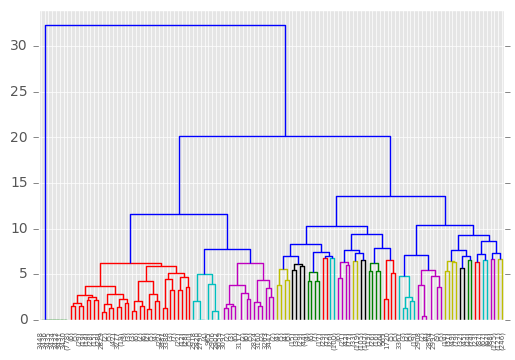

In [42]:
# 5. Using scipy's dendrogram function plot the linkages as
# a hierachical tree.
dendro = hierarchy.dendrogram(link, p=7, color_threshold=7, leaf_font_size=5, truncate_mode='level')
plt.show()

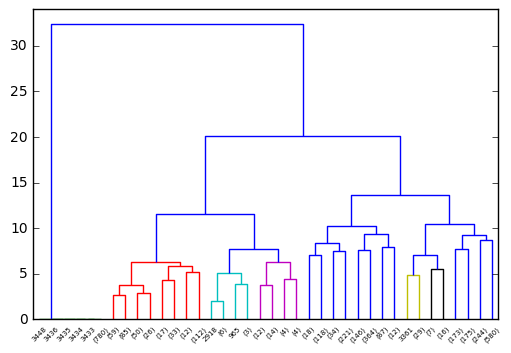

In [40]:
dendro = hierarchy.dendrogram(link, p=5, color_threshold=7, leaf_font_size=5, truncate_mode='level')
plt.show()

In [ ]:
false_text = false_claims[2]

In [ ]:
def tokenize(text_column):
    text_list = list(text_column)
    #convert all lines to strings (some were floats (?)
    string_list = []
    for item in text_list:
        string_list.append(str(item))

    # decode unicode into ascii
    content_clean = []
    for item in string_list:
        content_clean.append(item.decode('utf-8').encode('ascii','ignore').replace('\n', ' '))
    tokenized_list = [word_tokenize(content.lower()) for content in content_clean]
    return tokenized_list

def remove_stopwords(tokenized_list, stopword_list):
    stop = set(stopwords.words('english'))
    stop.update(stopword_list)
    documents = [[word for word in words if word not in stop]
        for words in tokenized_list]
    return documents

def stem(doc_list, stemmer ='snowball' ):
    stemmed_rows = []
    if stemmer=='snowball':
        for line in doc_list:
            stemmed = [snowball.stem(word) for word in line]
            stemmed_rows.append(stemmed)
    content_stemmed = []
    for row in stemmed_rows:
        content_stemmed.append(' '.join(row))
    return content_stemmed


In [ ]:
false_tokens = tokenize(false_text)

In [ ]:
false_no_stop = remove_stopwords(false_tokens, html_stopwords)

In [ ]:
false_stemmed = stem(false_no_stop)

In [ ]:
false_stemmed[0:5]

# False claims KMeans

In [ ]:
false_vector = TfidfVectorizer(stop_words=stop)
false_sparse_matrix = false_vector.fit_transform(false_stemmed)
false_features = false_vector.get_feature_names()

In [ ]:
false_features[5000:5050]

In [ ]:
! touch ../data/false_corpus.csv

In [ ]:
false_claims.to_csv('../data/false_corpus.csv')

In [ ]:
false_claims.head()

In [ ]:
km_false = KMeans(n_clusters=8)

In [ ]:
km_false.fit(false_sparse_matrix)

In [ ]:
km_false.cluster_centers_.shape.argsort()[:,]

In [ ]:
top_centroids = km_false.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(false_features[i] for i in centroid))